In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier,plot_tree 
import os


In [8]:
train_file_path ="D:\\Research Related Work\\Lung Cancer\\archive\\cancer patient data sets.csv"

cancer_train_data = pd.read_csv(train_file_path)

cancer_train_data.describe(include='all')
cancer_train_data.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [9]:
selected_columns = ['Age', 'Gender', 'Alcohol use', 'Genetic Risk', 'chronic Lung Disease', 'Wheezing', 'Level']

prepared_data = cancer_train_data[selected_columns]

prepared_data = prepared_data.dropna(axis=0)

prepared_data.describe(include='all')

,Age,Gender,Alcohol use,Genetic Risk,chronic Lung Disease,Wheezing,Level
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000
unique,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,High
freq,NaN,NaN,NaN,NaN,NaN,NaN,365
mean,37.174000,1.402000,4.563000,4.580000,4.380000,3.777000,NaN
std,12.005493,0.490547,2.620477,2.126999,1.848518,2.041921,NaN
min,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
25%,27.750000,1.000000,2.000000,2.000000,3.000000,2.000000,NaN
50%,36.000000,1.000000,5.000000,5.000000,4.000000,4.000000,NaN
75%,45.000000,2.000000,7.000000,7.000000,6.000000,5.000000,NaN


In [10]:
y = prepared_data.Level

X = prepared_data.drop('Level', axis=1)

X.head()

,Age,Gender,Alcohol use,Genetic Risk,chronic Lung Disease,Wheezing
0,33,1,4,3,2,2
1,17,1,1,4,2,8
2,35,1,5,5,4,2
3,37,1,7,6,7,1
4,46,1,8,7,6,1


In [11]:
one_hot_X = pd.get_dummies(X)

one_hot_X.head()

,Age,Gender,Alcohol use,Genetic Risk,chronic Lung Disease,Wheezing
0,33,1,4,3,2,2
1,17,1,1,4,2,8
2,35,1,5,5,4,2
3,37,1,7,6,7,1
4,46,1,8,7,6,1


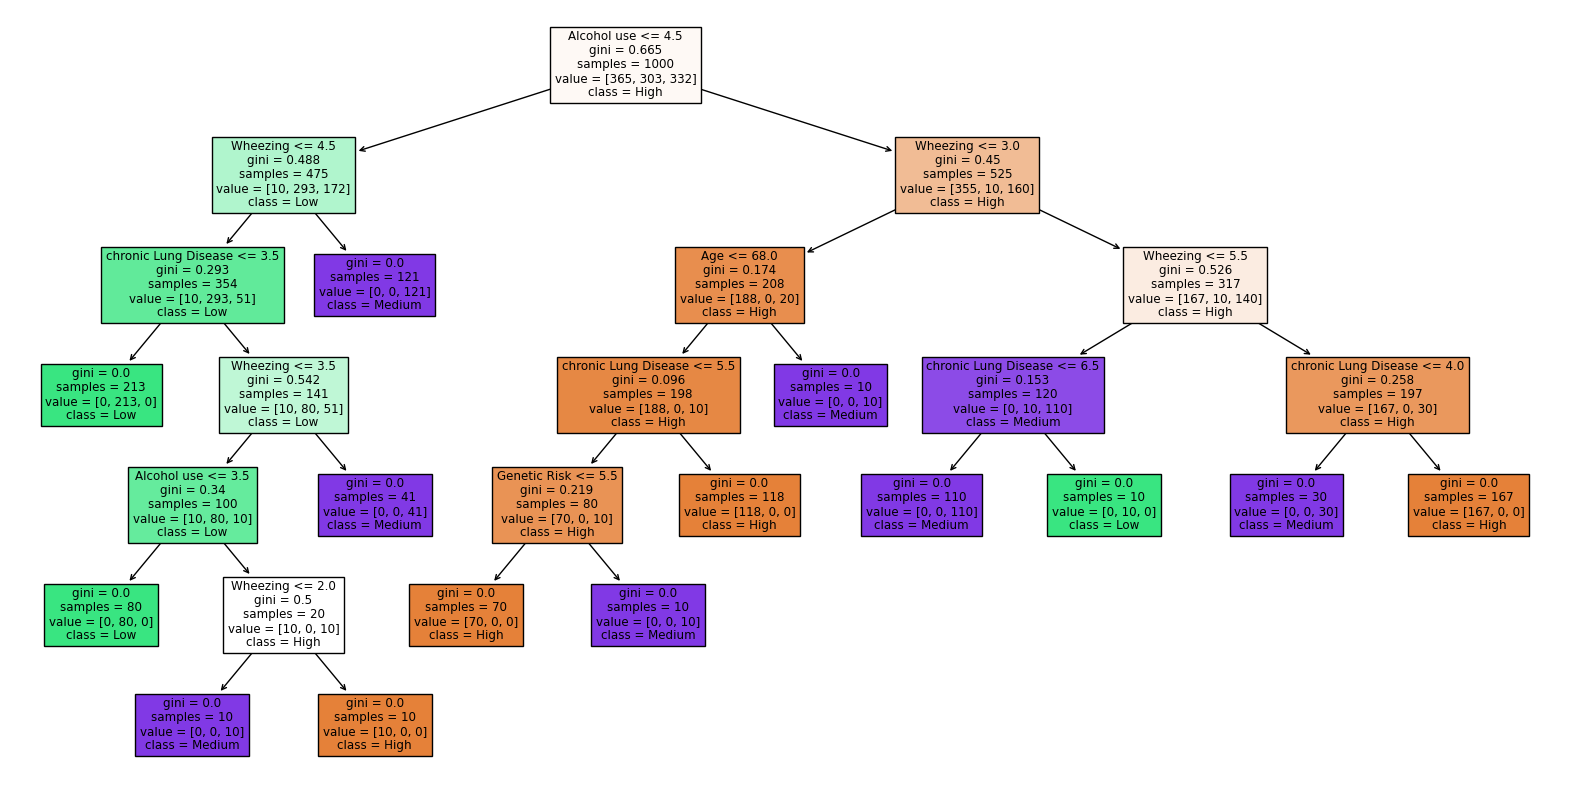

In [13]:
cancer_predictor = DecisionTreeClassifier(max_depth=6)

cancer_predictor.fit(one_hot_X, y)

plt.figure(figsize = (20,10))
plot_tree(cancer_predictor,
          feature_names=one_hot_X.columns,
          class_names=['High', 'Low', 'Medium'],
          filled=True)
plt.show()

In [7]:
print("Making predictions for the first 5 patients in the training set.")

pred = cancer_predictor.predict(one_hot_X)

print("The predictions are:")

X['Level'] = y
X['Predicted'] = pred

X.head()

Making predictions for the first 5 patients in the training set.
The predictions are:


,Age,Gender,Alcohol use,Genetic Risk,chronic Lung Disease,Wheezing,Level,Predicted
0,33,1,4,3,2,2,Low,Low
1,17,1,1,4,2,8,Medium,Medium
2,35,1,5,5,4,2,High,High
3,37,1,7,6,7,1,High,High
4,46,1,8,7,6,1,High,High
